# Atividade Avaliativa: Projeto Prático (Machine Learning Aplicado II)

- Projeto final referente a disciplina Machine Learning Aplicado II
- Professor: Juan Gabriel Colonna

**Membros da Equipe:**

- Arthur Bezerra
- Debora Barros
- Ronald Boadana


**Dataset escolhido:**
- [Heart Failure Dataset](https://www.kaggle.com/datasets/tan5577/heart-failure-dataset/data)

**Pergunta de pesquisa:**
- É possível prever se uma pessoa tem alguma doença do coração com base em indicadores clínicos (idade, sexo, colesterol...) ?

**Tipo do problema:**
- Classificação


#Importações necessárias

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score


## Análise e Exploração dos Dados

In [275]:
# importando e visualizando o dataset
df = pd.read_csv('heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [277]:
df.count()

,0
Age,918
Sex,918
ChestPainType,918
RestingBP,918
Cholesterol,918
FastingBS,918
RestingECG,918
MaxHR,918
ExerciseAngina,918
Oldpeak,918


In [278]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [279]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [280]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


### Checando a presença de valores zerados nas colunas

In [281]:
contagem_zeros_por_coluna = (df == 0).sum()
contagem_zeros_por_coluna

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,1
Cholesterol,172
FastingBS,704
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,368


- Das colunas podemos destacar o seguinte:
  - Cholesterol (Nível de colesterol): Não pode ser 0;
  - RestingBP (BMP em descanso): Não pode ser 0;
  - Old peak (Variação do segmento ST durante um ECG): Valores negativos e 0 são permitidos;
  - HeartDisease (Doença do coração): Variável alvo (valores com 0 ou 1)

In [282]:
# verificação de valores duplicados
duplicates = df.duplicated()
duplicates.sum()

np.int64(0)

### Visualizando a distribuição das variáveis númericas

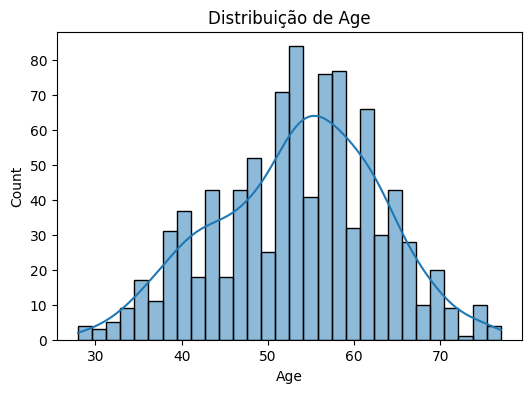

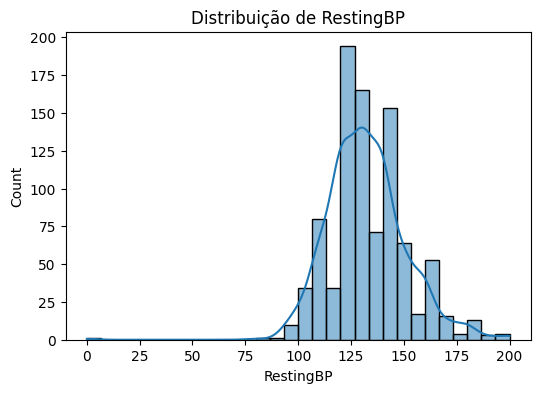

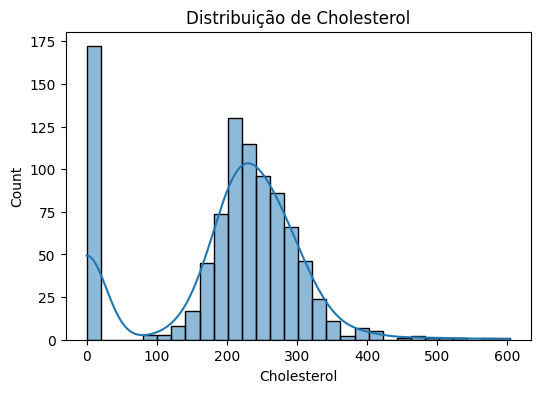

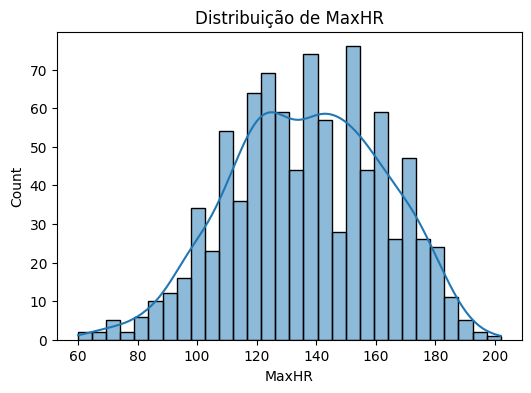

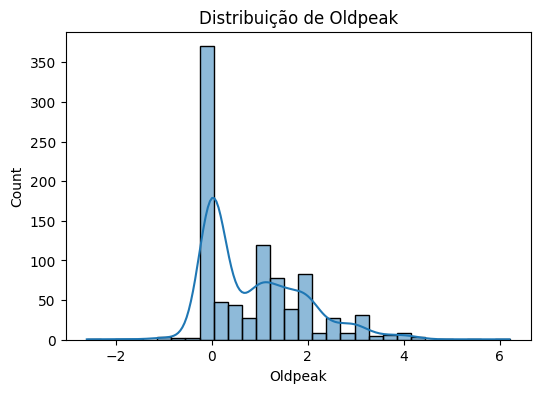

In [283]:
df_num_columns = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
for col in df_num_columns.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.show()

- Após observar a distribuição dos registros das colunas númericas será adotada uma estatrégia de pré-processamento:
  - Preencher os valores faltantes com a mediana dos registros das colunas

In [284]:
# preenchendo as colunas com valores zerados usando a mediana
# Calcular a mediana ignorando valores zero
median_value_cholesterol = df['Cholesterol'].replace(0, np.nan).median()
median_value_resting_bp = df['RestingBP'].replace(0, np.nan).median()

# Substituir zeros pela mediana
df['Cholesterol'] = df['Cholesterol'].replace(0, median_value_cholesterol)
df['RestingBP'] = df['RestingBP'].replace(0, median_value_resting_bp)

In [285]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [286]:
contagem_zeros_por_coluna = (df == 0).sum()
contagem_zeros_por_coluna

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,704
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,368


- Após o pré-processamento, percebe-se que as variáveis que receberam os valores ficaram adequadas

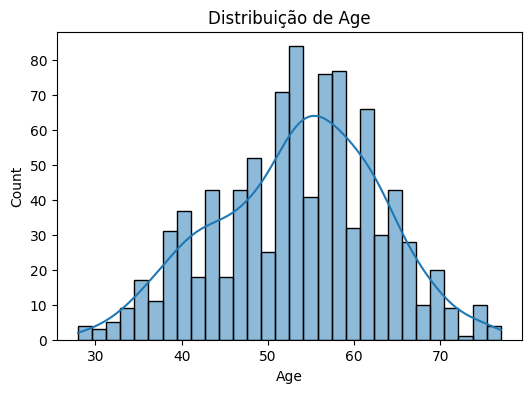

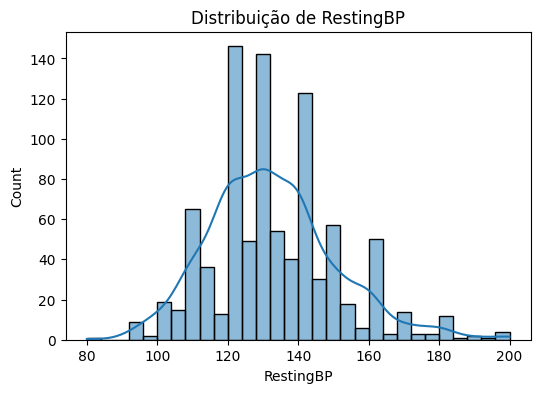

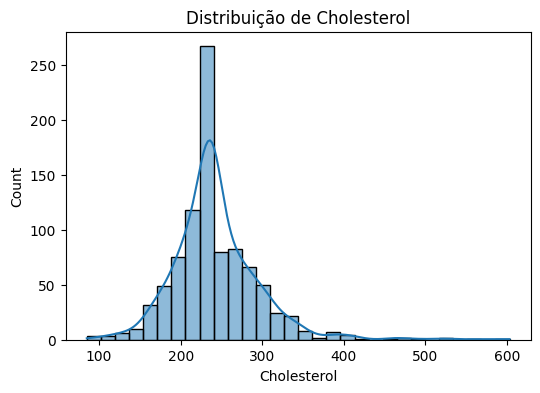

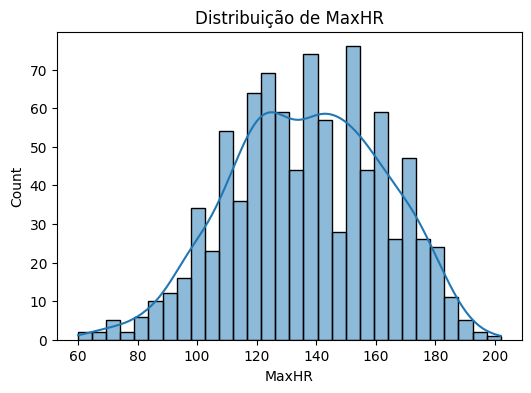

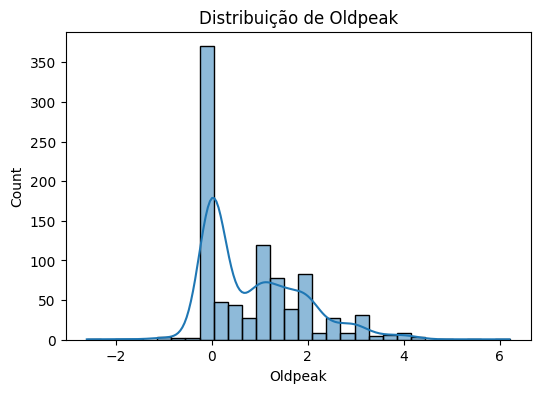

In [287]:
for col in df_num_columns.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.show()

- Verificando se a variável alvo está balanceada

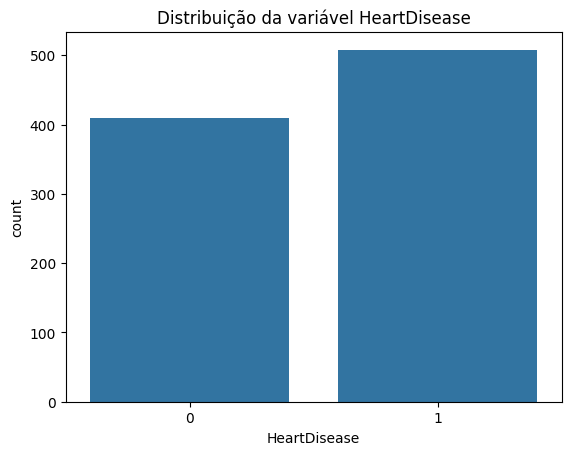

In [288]:
sns.countplot(x=df['HeartDisease'])
plt.title('Distribuição da variável HeartDisease')
plt.show()

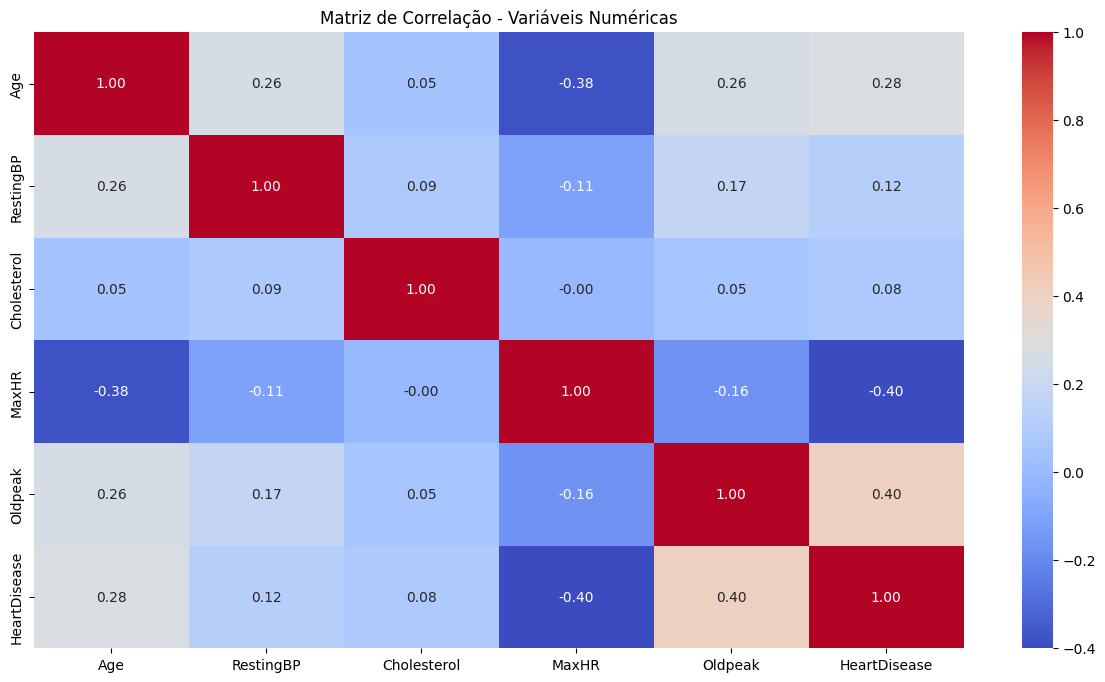

In [289]:
numeric_df = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']]

corr = numeric_df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()

# Experimento SEM PCA COM OVERSAMPLING + GRIDSEARCH (CV) + TRAIN TEST SPLIT

## Etapa 1: Codificar variáveis categóricas

In [290]:
# separando os dados
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [291]:
nominal_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# criar o OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# aplicar somente nas colunas categóricas
X_ohe = ohe.fit_transform(X[nominal_cols])

# transformar para DataFrame com nomes das colunas
ohe_feature_names = ohe.get_feature_names_out(nominal_cols)
X_ready = pd.DataFrame(X_ohe, columns=ohe_feature_names)

# variável alvo permanece como está
y_ready = y.values

In [292]:
X_ready

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [293]:
len(y_ready)

918

## Etapa 2: Normalizar ou padronizar

In [294]:
new_x_df = pd.DataFrame(X_ready, index=X.index)
X = X.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)

X_new = pd.concat([X, new_x_df], axis=1)
X_new.columns = X_new.columns.astype(str)

In [295]:
X_new

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [296]:
scaler = MinMaxScaler()

X_std = scaler.fit_transform(X_new)
X_std = pd.DataFrame(X_std, columns=X_new.columns)

In [297]:
X_std

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.393822,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.666667,0.183398,0.0,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.416667,0.382239,0.0,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.483333,0.249035,0.0,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.583333,0.212355,0.0,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.250000,0.345560,0.0,0.507042,0.431818,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.533333,0.208494,1.0,0.570423,0.681818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.416667,0.088803,0.0,0.387324,0.431818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.591837,0.416667,0.291506,0.0,0.802817,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Etapa 3: Balanceamento dos dados (Smote)

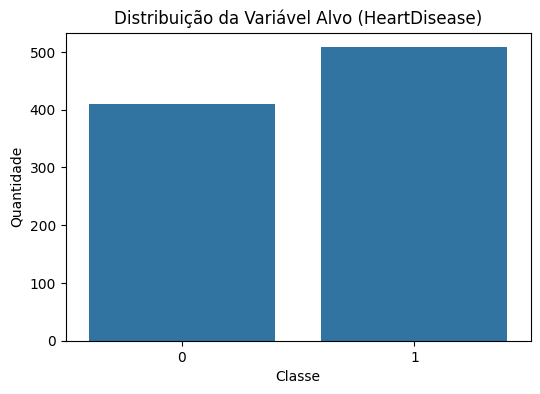

In [298]:
counts = y.value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Distribuição da Variável Alvo (HeartDisease)')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

In [299]:
X_std

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.393822,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.666667,0.183398,0.0,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.416667,0.382239,0.0,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.483333,0.249035,0.0,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.583333,0.212355,0.0,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.250000,0.345560,0.0,0.507042,0.431818,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.533333,0.208494,1.0,0.570423,0.681818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.416667,0.088803,0.0,0.387324,0.431818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.591837,0.416667,0.291506,0.0,0.802817,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [300]:
smote = SMOTE(random_state=42)
X_smoted, y_smoted = smote.fit_resample(X_std, y_ready)

In [301]:
X_smoted

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.393822,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.666667,0.183398,0.0,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.416667,0.382239,0.0,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.483333,0.249035,0.0,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.583333,0.212355,0.0,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.376336,0.496917,0.210735,0.0,0.344867,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1012,0.747527,0.239249,0.269679,0.0,0.536116,0.325696,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1013,0.605314,0.411321,0.248270,0.0,0.706307,0.345483,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1014,0.536409,0.323152,0.555945,0.0,0.598429,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Etapa 4: Treinar modelo

### Train and Test (split)

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, test_size=0.2, random_state=42, stratify=y_smoted)

In [303]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
617,0.591837,0.366667,0.339768,0.0,0.570423,0.329545,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
545,0.408163,0.433333,0.361004,0.0,0.556338,0.318182,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
179,0.367347,0.416667,0.295367,0.0,0.211268,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
187,0.265306,0.333333,0.293436,1.0,0.549296,0.409091,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
218,0.551020,0.500000,0.214286,0.0,0.633803,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0.585256,0.473130,0.336593,1.0,0.559974,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
615,0.857143,0.416667,0.457529,0.0,0.345070,0.568182,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
247,0.408163,0.350000,0.366795,1.0,0.633803,0.522727,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
177,0.632653,0.500000,0.389961,0.0,0.633803,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [304]:
X_train.shape, y_train.shape

((812, 20), (812,))

In [305]:
X_test.shape, y_test.shape

((204, 20), (204,))

In [306]:
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(),
}

## Etapa 5: Otimizar hiperparâmetros com Grid Search

In [307]:
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"]
    }
}

In [308]:
best_models = {}

for name, model in models.items():
    print(f"Performing Grid Search for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print("-" * 40)

Performing Grid Search for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
----------------------------------------
Performing Grid Search for KNN...
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}
----------------------------------------
Performing Grid Search for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
----------------------------------------
Performing Grid Search for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 30, 'min_samples_split': 10}
----------------------------------------
Performing Grid Search for SVC...
Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
----------------------------------------


## Etapa 6: Avaliar os Melhores Modelos

### Gráfico comparativo dos modelos baseado no F1-Score

Evaluating Random Forest with best parameters...
Model: Random Forest
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       102
           1       0.90      0.92      0.91       102

    accuracy                           0.91       204
   macro avg       0.91      0.91      0.91       204
weighted avg       0.91      0.91      0.91       204

Tempo de execução: 0.0171 segundos
----------------------------------------


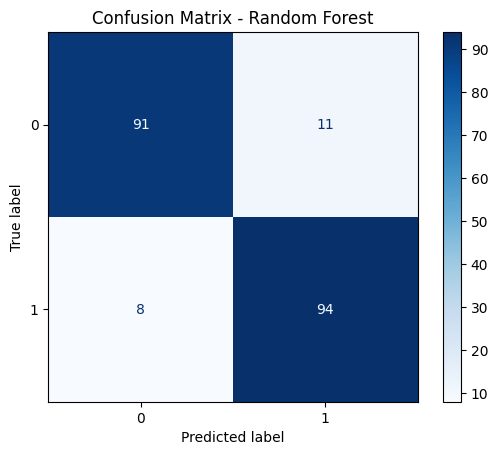

Evaluating KNN with best parameters...
Model: KNN
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       102
           1       0.86      0.85      0.86       102

    accuracy                           0.86       204
   macro avg       0.86      0.86      0.86       204
weighted avg       0.86      0.86      0.86       204

Tempo de execução: 0.0063 segundos
----------------------------------------


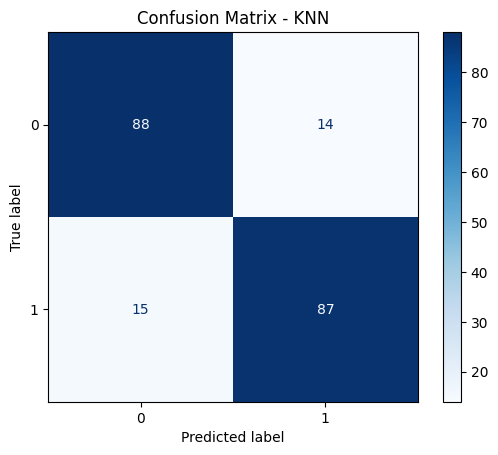

Evaluating Logistic Regression with best parameters...
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       102
           1       0.84      0.89      0.87       102

    accuracy                           0.86       204
   macro avg       0.86      0.86      0.86       204
weighted avg       0.86      0.86      0.86       204

Tempo de execução: 0.0017 segundos
----------------------------------------


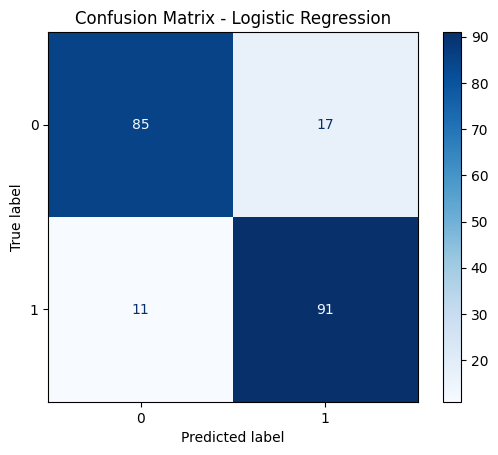

Evaluating Decision Tree with best parameters...
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       102
           1       0.85      0.75      0.80       102

    accuracy                           0.81       204
   macro avg       0.81      0.81      0.81       204
weighted avg       0.81      0.81      0.81       204

Tempo de execução: 0.0022 segundos
----------------------------------------


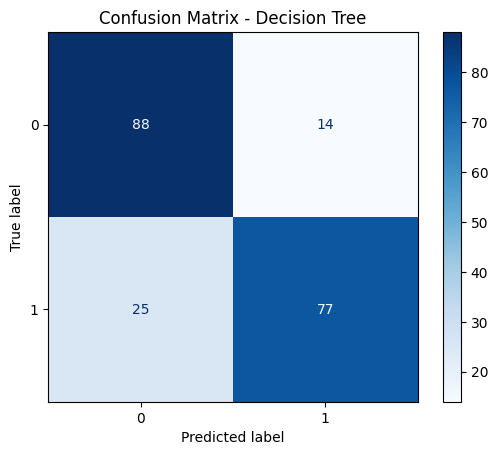

Evaluating SVC with best parameters...
Model: SVC
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       102
           1       0.83      0.88      0.85       102

    accuracy                           0.85       204
   macro avg       0.85      0.85      0.85       204
weighted avg       0.85      0.85      0.85       204

Tempo de execução: 0.0079 segundos
----------------------------------------


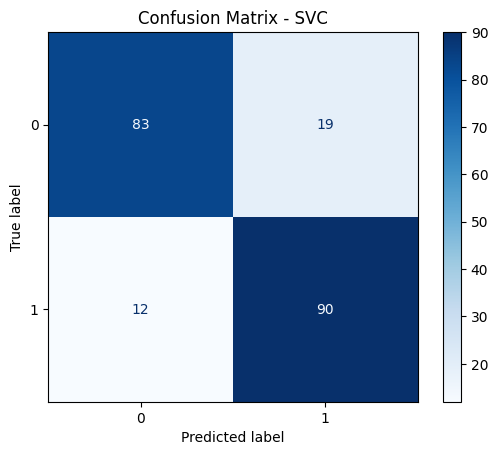

In [309]:
results_best = []

for name, model in best_models.items():
    print(f"Evaluating {name} with best parameters...")

    # Medir tempo somente da predição
    start = time.time()
    y_pred = model.predict(X_test)
    end = time.time()
    exec_time = end - start

    # F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Salvar resultados
    results_best.append({
        "Modelo": name,
        "F1-Score": f1,
        "Tempo (s)": exec_time
    })

    # Classification Report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"Tempo de execução: {exec_time:.4f} segundos")
    print("-" * 40)

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


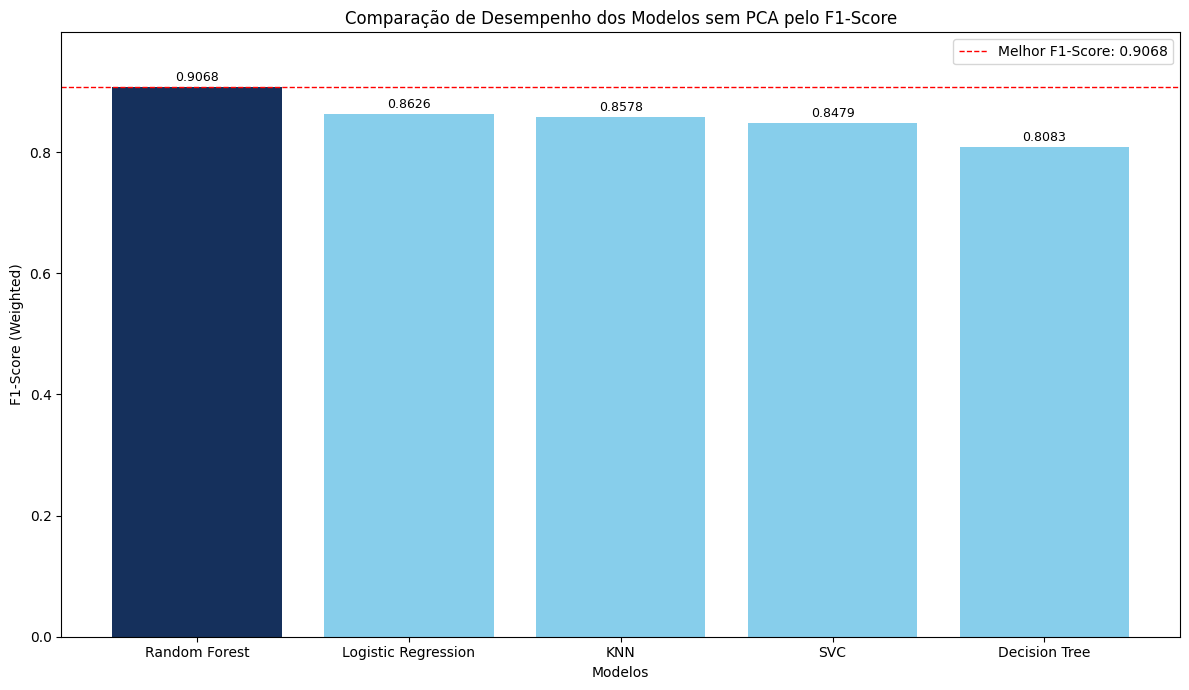

In [310]:
df_best_results = pd.DataFrame(results_best)
df_best_results = df_best_results.sort_values(by="F1-Score", ascending=False)

# Melhor modelo
best_model_name = df_best_results.iloc[0]["Modelo"]
best_f1_score = df_best_results.iloc[0]["F1-Score"]

# Listas para o gráfico
sorted_model_names = df_best_results["Modelo"].tolist()
sorted_f1_values = df_best_results["F1-Score"].tolist()

# Cores — destacar o melhor modelo
colors = ['skyblue' if name != best_model_name else '#15305c'
          for name in sorted_model_names]

# Plot
plt.figure(figsize=(12, 7))
bars = plt.bar(sorted_model_names, sorted_f1_values, color=colors)

# Textos acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        yval + 0.005,
        f'{yval:.4f}',
        va='bottom',
        ha='center',
        fontsize=9
    )

# Linha destacando o melhor modelo
plt.axhline(best_f1_score, color='red', linestyle='--', linewidth=1,
            label=f'Melhor F1-Score: {best_f1_score:.4f}')
plt.legend()

plt.ylabel('F1-Score (Weighted)')
plt.xlabel('Modelos')
plt.title('Comparação de Desempenho dos Modelos sem PCA pelo F1-Score')
plt.xticks(rotation=0)
plt.ylim(0, max(sorted_f1_values) * 1.1)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()

In [311]:
df_comparison = df_best_results.sort_values(by="F1-Score", ascending=False)
display(df_comparison)

,Modelo,F1-Score,Tempo (s)
0,Random Forest,0.906843,0.017064
2,Logistic Regression,0.862626,0.001720
1,KNN,0.857840,0.006302
4,SVC,0.847860,0.007902
3,Decision Tree,0.808266,0.002184


# Experimento COM PCA COM OVERSAMPLING + GRIDSEARCH (CV) + TRAIN TEST SPLIT

In [312]:
X_new

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [313]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_pca_fit = pca.fit_transform(X_smoted)

scaler = MinMaxScaler()
X_pca_scaled = scaler.fit_transform(X_pca_fit)
X_pca = pd.DataFrame(X_pca_scaled)

In [314]:
X_smoted

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.393822,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.666667,0.183398,0.0,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.416667,0.382239,0.0,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.483333,0.249035,0.0,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.583333,0.212355,0.0,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.376336,0.496917,0.210735,0.0,0.344867,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1012,0.747527,0.239249,0.269679,0.0,0.536116,0.325696,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1013,0.605314,0.411321,0.248270,0.0,0.706307,0.345483,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1014,0.536409,0.323152,0.555945,0.0,0.598429,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [315]:
X_pca

,0,1,2,3,4,5,6,7
0,0.114739,0.929147,0.799211,0.436806,0.536537,0.487815,0.669071,0.400191
1,0.332010,0.675759,0.038300,0.796855,0.554210,0.420367,0.315618,0.268150
2,0.180975,0.368647,0.930789,0.389792,0.505572,0.797885,0.612991,0.230915
3,0.795501,0.801815,0.062776,0.283286,0.536117,0.371457,0.407249,0.315785
4,0.168329,0.846677,0.762623,0.676554,0.392900,0.283477,0.240695,0.258026
...,...,...,...,...,...,...,...,...
1011,0.167157,0.853972,0.762762,0.675580,0.394356,0.284815,0.241371,0.251379
1012,0.224511,0.724424,0.322896,0.175564,0.758360,0.259552,0.218503,0.262797
1013,0.614221,0.964827,0.785576,0.164249,0.369787,0.223721,0.342133,0.311793
1014,0.019798,0.754602,0.297998,0.274572,0.545240,0.514588,0.572158,0.456347


In [316]:
len(y_ready)

918

In [317]:
len(y_smoted)

1016

In [318]:
X_train_pca_smoted, X_test_pca_smoted, y_train_pca_smoted, y_test_pca_smoted = train_test_split(X_pca, y_smoted, test_size=0.2, random_state=42, stratify=y_smoted)

In [319]:
X_train_pca_smoted

,0,1,2,3,4,5,6,7
617,0.128930,0.919908,0.800899,0.438853,0.539073,0.489867,0.658551,0.408662
545,0.376122,0.332740,0.951987,0.290060,0.715882,0.536471,0.267356,0.043143
179,0.227429,0.738537,0.323148,0.172921,0.759699,0.267689,0.219206,0.250719
187,0.921842,0.931261,0.607709,0.475915,0.613576,0.429395,0.356777,0.651937
218,0.125973,0.920234,0.801909,0.439196,0.537231,0.490496,0.660025,0.407954
...,...,...,...,...,...,...,...,...
925,0.161331,0.876583,0.846074,0.469237,0.621088,0.579327,0.513011,0.799151
615,0.658222,0.253629,0.680093,0.631697,0.893997,0.129417,0.624399,0.239876
247,0.856097,0.342289,0.877182,0.260649,0.477760,0.640354,0.183218,0.605343
177,0.128293,0.916300,0.800349,0.438914,0.537768,0.489722,0.659559,0.412216


In [320]:
models_pca_smote = {
    "Random Forest (PCA)": RandomForestClassifier(),
    "KNN (PCA)": KNeighborsClassifier(),
    "Logistic Regression (PCA)": LogisticRegression(),
    "Decision Tree (PCA)": DecisionTreeClassifier(),
    "SVC (PCA)": SVC(),
}

best_models_pca_smote = {}

for name, model in models_pca_smote.items():
    print(f"Performing Grid Search for {name}...")
    grid_search_pca_smote = GridSearchCV(model, param_grids[name.replace(' (PCA)', '')], cv=5, scoring='f1', n_jobs=-1)
    grid_search_pca_smote.fit(X_train_pca_smoted, y_train_pca_smoted)
    best_models_pca_smote[name] = grid_search_pca_smote.best_estimator_
    print(f"Best parameters for {name}: {grid_search_pca_smote.best_params_}")
    print("-" * 40)

Performing Grid Search for Random Forest (PCA)...
Best parameters for Random Forest (PCA): {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
----------------------------------------
Performing Grid Search for KNN (PCA)...
Best parameters for KNN (PCA): {'n_neighbors': 9, 'weights': 'uniform'}
----------------------------------------
Performing Grid Search for Logistic Regression (PCA)...
Best parameters for Logistic Regression (PCA): {'C': 1, 'solver': 'lbfgs'}
----------------------------------------
Performing Grid Search for Decision Tree (PCA)...
Best parameters for Decision Tree (PCA): {'max_depth': 30, 'min_samples_split': 2}
----------------------------------------
Performing Grid Search for SVC (PCA)...
Best parameters for SVC (PCA): {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
----------------------------------------


In [321]:
best_models_pca_smote

{'Random Forest (PCA)': RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200),
 'KNN (PCA)': KNeighborsClassifier(n_neighbors=9),
 'Logistic Regression (PCA)': LogisticRegression(C=1),
 'Decision Tree (PCA)': DecisionTreeClassifier(max_depth=30),
 'SVC (PCA)': SVC(C=1, gamma='auto')}

Evaluating Random Forest (PCA) with best parameters...
Model: Random Forest (PCA)
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       102
           1       0.87      0.86      0.87       102

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.87      0.87      0.87       204

Tempo de execução: 0.0210 segundos
----------------------------------------


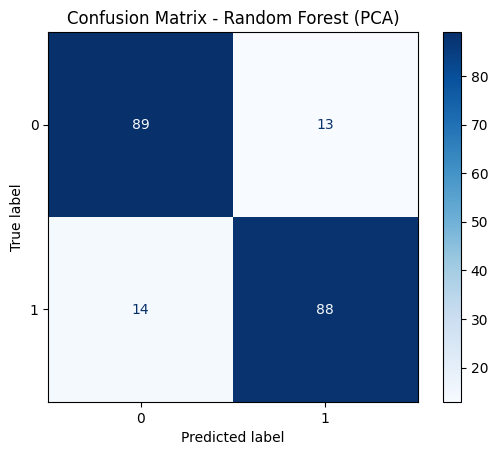

Evaluating KNN (PCA) with best parameters...
Model: KNN (PCA)
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       102
           1       0.90      0.84      0.87       102

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.87      0.87      0.87       204

Tempo de execução: 0.0058 segundos
----------------------------------------


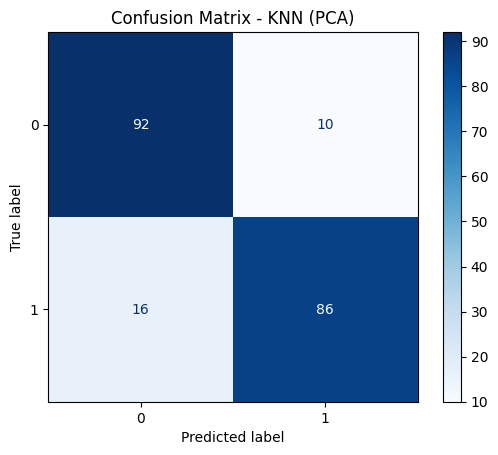

Evaluating Logistic Regression (PCA) with best parameters...
Model: Logistic Regression (PCA)
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       102
           1       0.86      0.93      0.89       102

    accuracy                           0.89       204
   macro avg       0.89      0.89      0.89       204
weighted avg       0.89      0.89      0.89       204

Tempo de execução: 0.0011 segundos
----------------------------------------


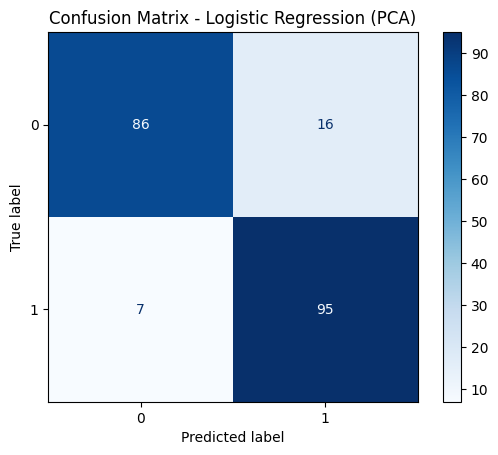

Evaluating Decision Tree (PCA) with best parameters...
Model: Decision Tree (PCA)
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       102
           1       0.83      0.78      0.81       102

    accuracy                           0.81       204
   macro avg       0.81      0.81      0.81       204
weighted avg       0.81      0.81      0.81       204

Tempo de execução: 0.0015 segundos
----------------------------------------


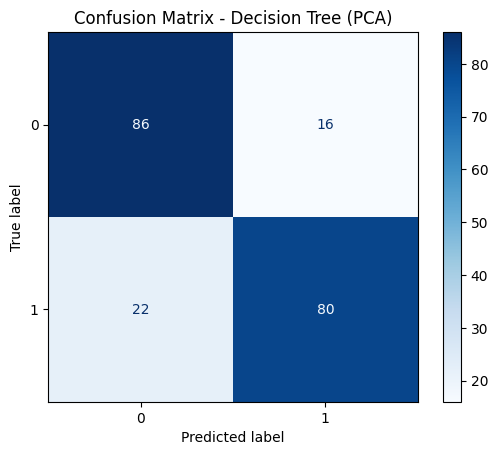

Evaluating SVC (PCA) with best parameters...
Model: SVC (PCA)
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       102
           1       0.84      0.95      0.89       102

    accuracy                           0.89       204
   macro avg       0.89      0.89      0.89       204
weighted avg       0.89      0.89      0.89       204

Tempo de execução: 0.0095 segundos
----------------------------------------


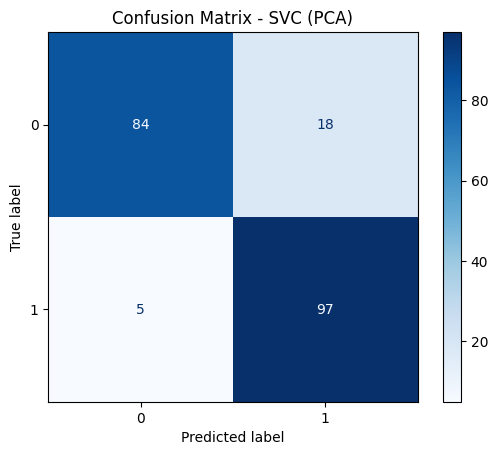

In [322]:
results_best_pca = []
for name, model in best_models_pca_smote.items():
    print(f"Evaluating {name} with best parameters...")

    start = time.time()

    y_pred_pca_smote = model.predict(X_test_pca_smoted)

    end = time.time()
    exec_time = end - start

        # F1-score
    f1 = f1_score(y_test_pca_smoted, y_pred_pca_smote, average='weighted')

    # Salvar resultados
    results_best_pca.append({
        "Modelo": name,
        "F1-Score": f1,
        "Tempo (s)": exec_time
    })

    # Classification Report
    print(f"Model: {name}")
    print(classification_report(y_test_pca_smoted, y_pred_pca_smote))
    print(f"Tempo de execução: {exec_time:.4f} segundos")
    print("-" * 40)

    # Confusion Matrix as a plot
    cm_pca_smote = confusion_matrix(y_test_pca_smoted, y_pred_pca_smote)
    disp_pca_smote = ConfusionMatrixDisplay(confusion_matrix=cm_pca_smote)
    disp_pca_smote.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [323]:
df_best_results_pca = pd.DataFrame(results_best_pca)
df_best_results_pca

,Modelo,F1-Score,Tempo (s)
0,Random Forest (PCA),0.867644,0.020966
1,KNN (PCA),0.872439,0.005798
2,Logistic Regression (PCA),0.887035,0.001127
3,Decision Tree (PCA),0.813564,0.001484
4,SVC (PCA),0.886795,0.009491


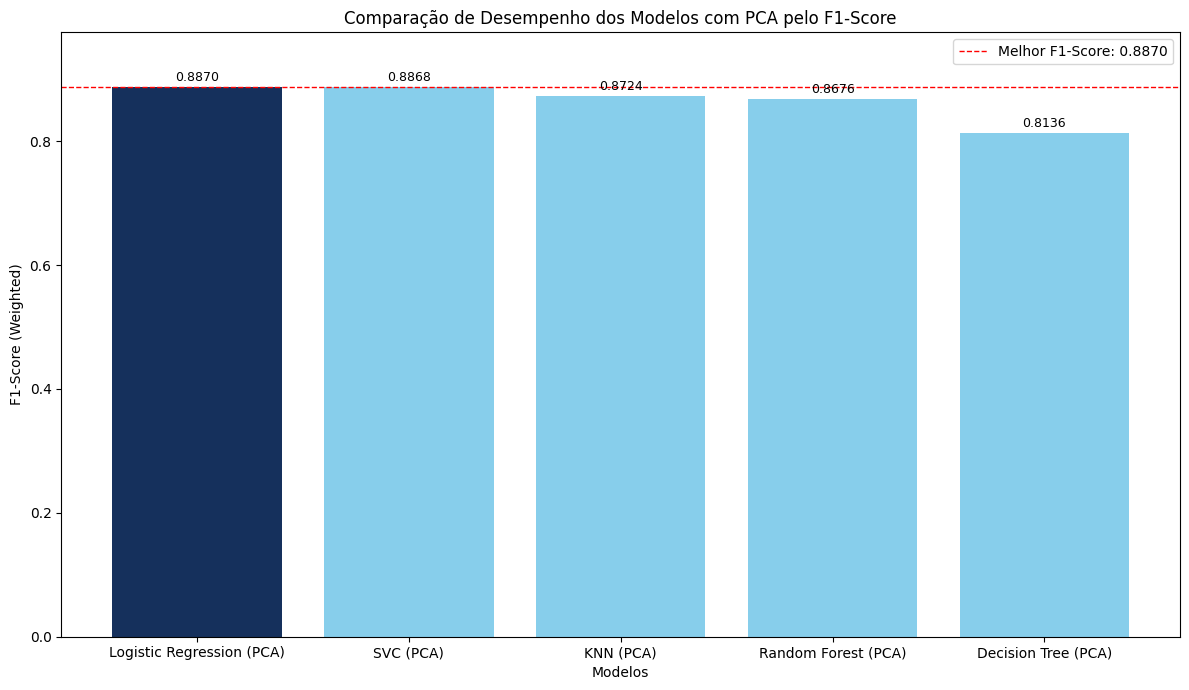

In [324]:
df_best_results_pca = df_best_results_pca.sort_values(by="F1-Score", ascending=False)

# Pega o melhor modelo
best_model_name = df_best_results_pca.iloc[0]["Modelo"]
best_f1_score = df_best_results_pca.iloc[0]["F1-Score"]

# Listas ordenadas
sorted_model_names = df_best_results_pca["Modelo"].tolist()
sorted_f1_values = df_best_results_pca["F1-Score"].tolist()

# Cores (melhor modelo destacado)
colors = ['skyblue' if name != best_model_name else '#15305c'
          for name in sorted_model_names]

# Gráfico
plt.figure(figsize=(12, 7))
bars = plt.bar(sorted_model_names, sorted_f1_values, color=colors)

# Mostrar valores em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        yval + 0.005,
        f'{yval:.4f}',
        va='bottom',
        ha='center',
        fontsize=9
    )

# Linha horizontal destacando o melhor modelo
plt.axhline(best_f1_score, color='red', linestyle='--', linewidth=1,
            label=f'Melhor F1-Score: {best_f1_score:.4f}')
plt.legend()

plt.ylabel('F1-Score (Weighted)')
plt.xlabel('Modelos')
plt.title('Comparação de Desempenho dos Modelos com PCA pelo F1-Score')
plt.xticks(rotation=0)
plt.ylim(0, max(sorted_f1_values) * 1.1)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()


In [325]:
df_comparison_pca = df_best_results_pca.sort_values(by="F1-Score", ascending=False)
display(df_comparison_pca)

,Modelo,F1-Score,Tempo (s)
2,Logistic Regression (PCA),0.887035,0.001127
4,SVC (PCA),0.886795,0.009491
1,KNN (PCA),0.872439,0.005798
0,Random Forest (PCA),0.867644,0.020966
3,Decision Tree (PCA),0.813564,0.001484
